# Relationships - Correlation

## Data



In [64]:
import pandas as pd

gdp_df = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3930492.csv")
#pop_df = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_3918567.csv")
life_exp_df = pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_csv_v2_3930088.csv")

# building main df, using only 'Country Name' = GUAM and setting year to index
df  = pd.concat([gdp_df[gdp_df['Country Name'] == 'Guam'],
                 #pop_df[pop_df['Country Name'] == 'Guam'],
                 life_exp_df[life_exp_df['Country Name'] == 'Guam']])

df = df.drop(['Country Name', 'Country Code', 'Indicator Code', 'Unnamed: 65'], axis=1)
df = df.set_index('Indicator Name').transpose()
df.index = df.index.astype(int)

# 2019 is the last year not affected by COVID
# GDP per capita starts in 2002
df = df.loc[2002:2019]
df

Indicator Name,GDP per capita (current US$),"Life expectancy at birth, total (years)"
2002,21594.039689,75.726
2003,22628.278691,76.065
2004,24472.782016,76.387
2005,26596.214790,76.687
2006,26713.058387,76.966
2007,27680.549960,77.227
2008,29288.781856,77.474
2009,30320.538585,77.710
2010,31040.084296,77.941
2011,31210.470286,78.173


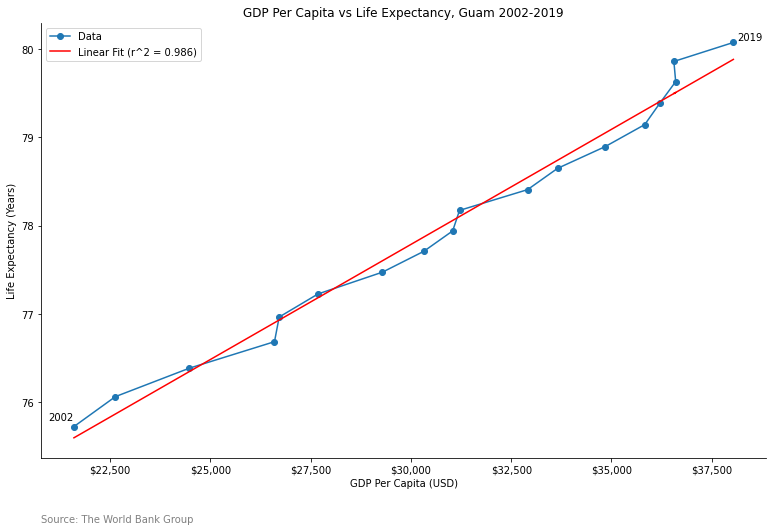

In [118]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.metrics import r2_score
import numpy as np

x_val = df['GDP per capita (current US$)']
y_val = df['Life expectancy at birth, total (years)']

fig, ax = plt.subplots(figsize=(13, 8), facecolor='white')

ax.plot(x_val,
        y_val,
        linestyle='-',
        marker='o',
        label="Data")

fit = np.polyfit(x_val,y_val, 1, full=True)
coeff = fit[0]

predict = np.poly1d(coeff)
R2 = r2_score(y_val,
              predict(x_val))

ax.plot(x_val,
        predict(x_val),
        'r',
        label=f"Linear Fit (r^2 = {R2:.3f})")

ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('GDP Per Capita vs Life Expectancy, Guam 2002-2019')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.legend()

plt.annotate("Source: The World Bank Group",
             (0.0, -0.15),
             xycoords='axes fraction',
             color='grey')
plt.annotate("2002",
             (x_val.loc[2002], y_val.loc[2002]),
             xytext=(0, 4),
             textcoords='offset points',
             horizontalalignment='right',
             verticalalignment='bottom')
plt.annotate("2019",
             (x_val.loc[2019], y_val.loc[2019]),
             xytext=(4, 0),
             textcoords='offset points',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.show()